Import the libraries

In [1]:
import scipy.io as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


Read the data

In [3]:
data = s.loadmat('data.mat')
data
X=np.array(data['X'])
xval=np.array(data['Xval'])
yval=np.array(data['yval'])
X
df=pd.DataFrame(X)

Plot the data

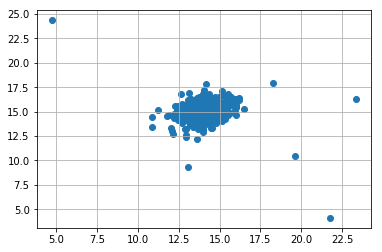

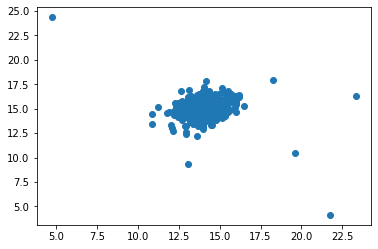

In [4]:
X1 = X[:,0]
X2 = X[:,1]
plt.scatter(X1,X2)


In [5]:
df

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849
...,...,...
302,12.476629,14.459370
303,19.582573,10.411619
304,23.339868,16.298874
305,18.261188,17.978309


Find outliers and color them in red. You need to choose your own epsilon

In [6]:
Q1 = df[0].quantile(0.25)
Q3 = df[0].quantile(0.75)
IQR = Q3 - Q1
IQR 

1.272151586359488

In [9]:
ul = Q3 + 1.5*IQR
ll = Q1 - 1.5*IQR
print('Upper lim:', ul)
print('Upper lim:' , ll)

Upper lim: 16.58373005428143
Upper lim: 11.495123708843476


In [14]:
outliers = df[0][(df[0]>ul ) | (df[0] < ll)]
print('outliers','\n',outliers)
print('num of outliers:' ,outliers.shape[0])

outliers 
 109    11.249155
147    10.859401
170    10.882213
301    21.727134
303    19.582573
304    23.339868
305    18.261188
306     4.752613
Name: 0, dtype: float64
num of outliers: 8


Text(0.5, 1.0, 'IQR')

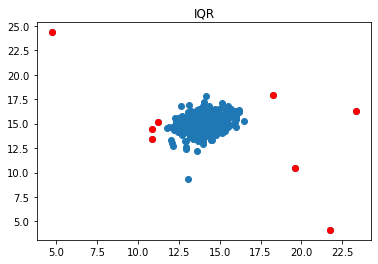

In [15]:
#1-RD VARIANT OF PLOT OUTLIERS
plt.scatter(X1,X2)
plt.scatter(outliers,X2[outliers.index], color='red')
plt.title("IQR")


In [16]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=15, min_samples=200).fit(df)
clustering = DBSCAN(eps=2, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

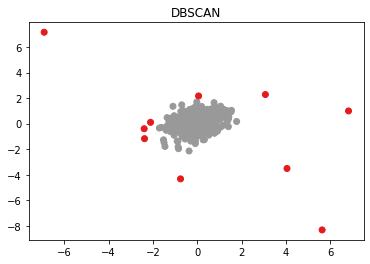

In [17]:
#2-RD VARIANT OF PLOT OUTLIERS
from sklearn.preprocessing import StandardScaler
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred,cmap='Set1')
    plt.title("DBSCAN")
        
dbscan(X, eps=0.7, min_samples=16)

In [31]:
#3-RD VARIANT OF PLOT OUTLIERS
X_train,X_test,y_train,y_test=train_test_split(X,yval,test_size=0.2)


In [51]:
m = X.shape[0]
sum_ = np.sum(X,axis=0)
mu = (sum_/m)
sigma = np.var(X,axis=0)


In [ ]:
k = len(mu)
sigma=np.diag(sigma)
X = X - mu.T
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))

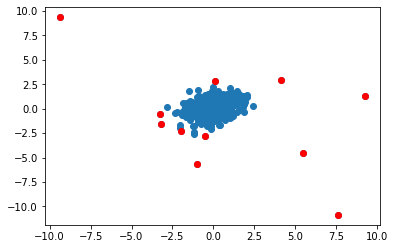

In [53]:
plt.scatter(X[:,0],X[:,1]);
eps=0.009
outl = np.nonzero(p<eps)[0]
plt.scatter(X[outl,0],X[outl,1],c='red');